In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score

In [17]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(df)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        

In [18]:
df.shape

(253680, 22)

In [19]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [20]:
df.dtypes
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [21]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

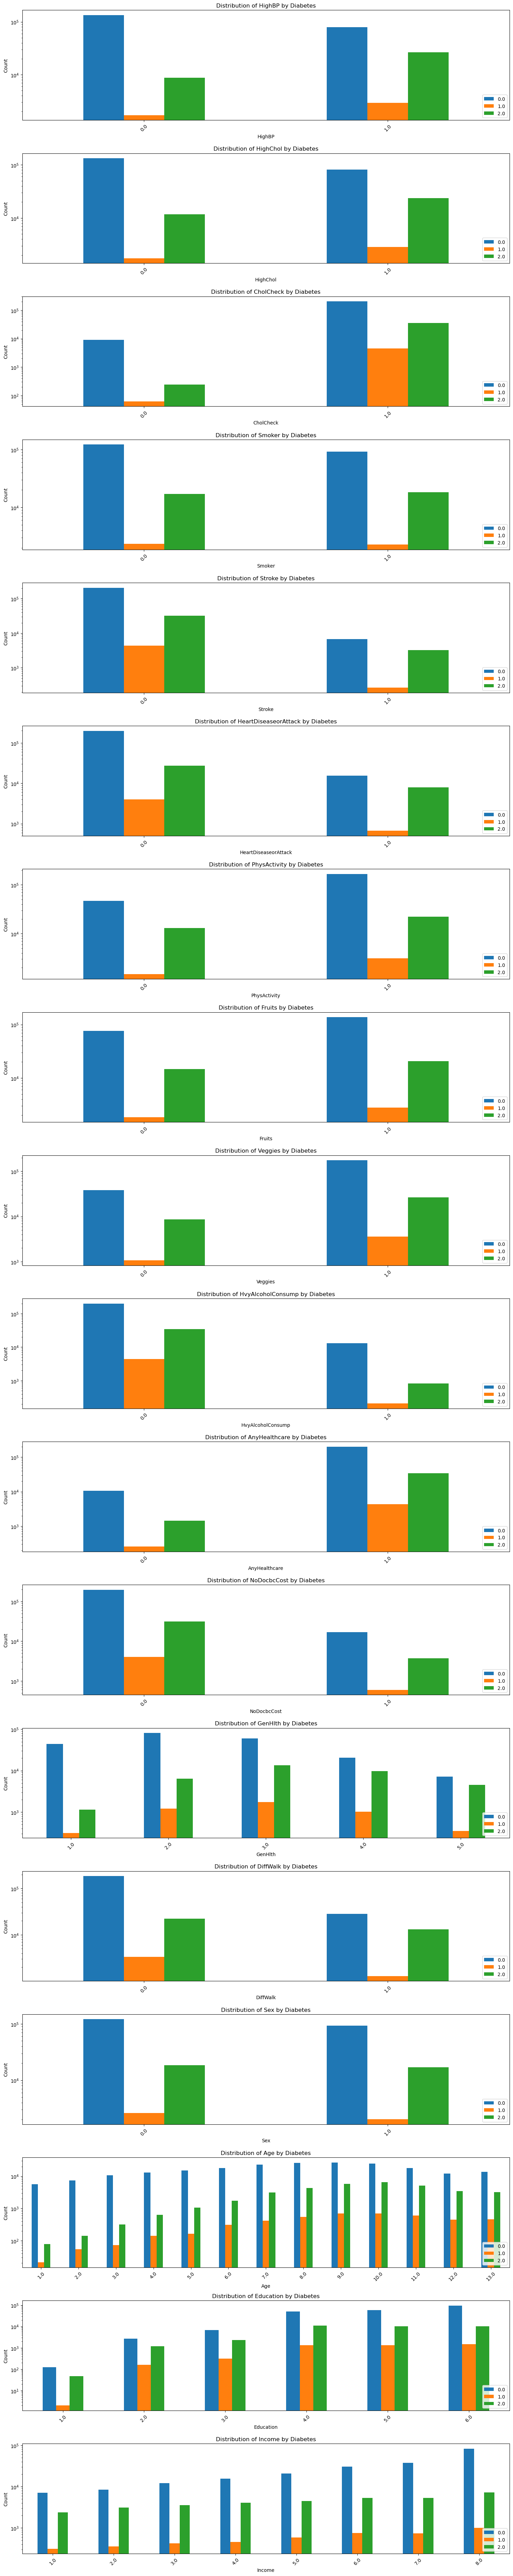

In [22]:
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)

categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

plt.figure(figsize = (15,75))

for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    
    # Target feature is diabetes
    ct = pd.crosstab(df[feature], df['Diabetes'])
    
    ct.plot(kind='bar', stacked=False, ax=plt.gca())
    plt.yscale('log')
    plt.title(f'Distribution of {feature} by Diabetes')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [23]:
X = df.drop('Diabetes', axis=1) 
y = df['Diabetes']

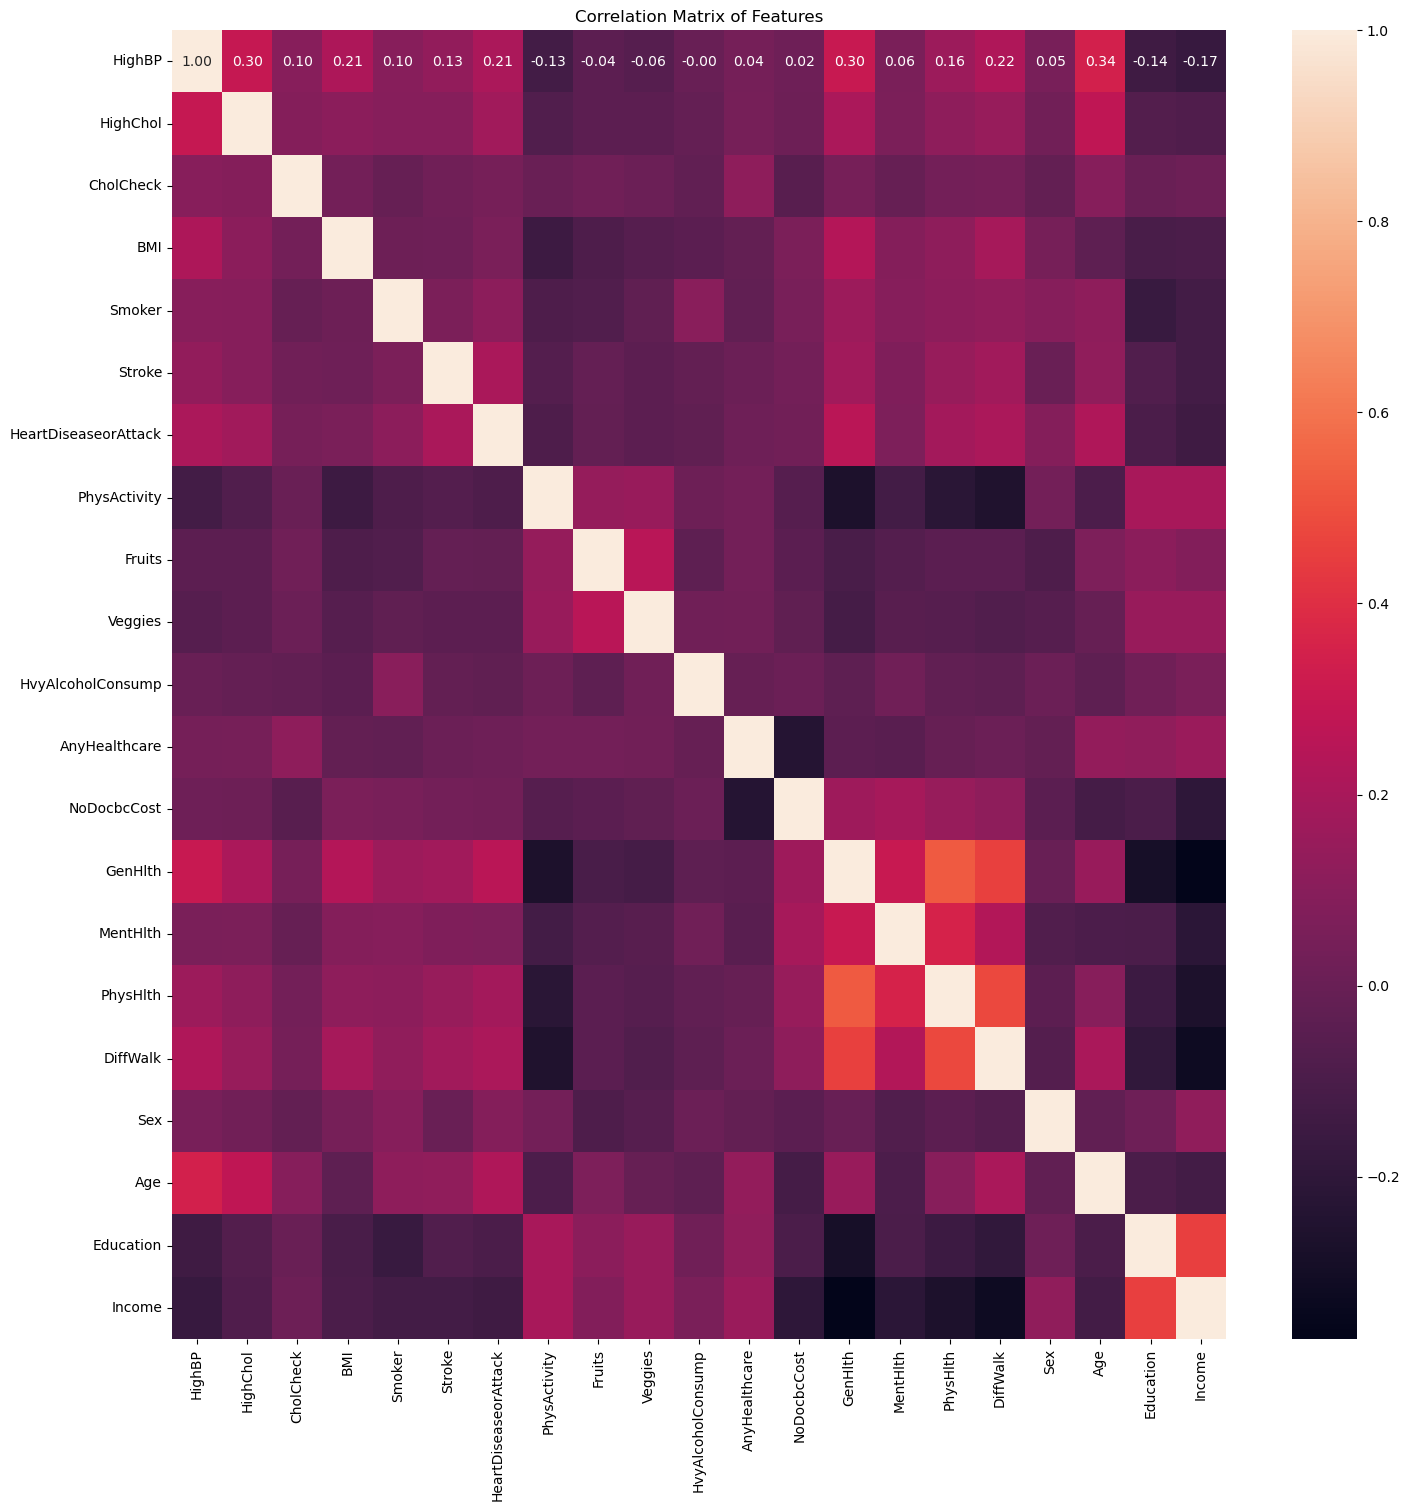

In [24]:
correlation_matrix = X.corr()
plt.figure(figsize=(17, 17))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [25]:
# Calculate the absolute correlation matrix
correlation_matrix_ab = correlation_matrix.abs()

correlation_series = correlation_matrix_ab.unstack()

# Remove identical feature pairs 
correlation_series = correlation_series[correlation_series < 1]

# Filter for correlations above 0.5
high_correlations = correlation_series[correlation_series > 0.5]

print("Correlations above 0.5:")
for (feature_pair, value) in high_correlations.items():
    print(f"{feature_pair}: {value}")

Correlations above 0.5:
('GenHlth', 'PhysHlth'): 0.5243636438493371
('PhysHlth', 'GenHlth'): 0.5243636438493371


In [26]:
class_counts = df['Diabetes'].value_counts()
print(class_counts.sort_index())

# Format the proportions to 4 decimal places
proportions = class_counts.sort_index() / df['Diabetes'].shape[0]
print(proportions.apply(lambda x: f"{x:.4f}"))


Diabetes
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64
Diabetes
0.0    0.8424
1.0    0.0183
2.0    0.1393
Name: count, dtype: object


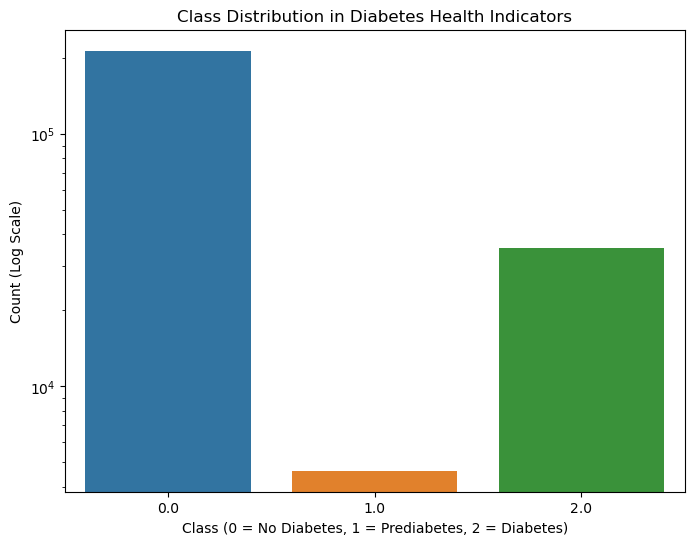

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.yscale('log') # Using log scale to handle the extreme imbalance
plt.xlabel('Class (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)')
plt.ylabel('Count (Log Scale)')
plt.title('Class Distribution in Diabetes Health Indicators')
plt.show()

In [28]:
# Split the dataset into training (60%), validation (20%), and test (20%) sets.
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, 
                                                stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, 
                                                  stratify=y_dev, random_state=42)

print(f"Training data size: {len(y_train)}")
print(f"Validation data size: {len(y_val)}")
print(f"Test data size: {len(y_test)}")

Training data size: 152208
Validation data size: 50736
Test data size: 50736


In [29]:
scaler = StandardScaler()

X_dev[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(X_dev[['BMI', 'MentHlth', 'PhysHlth']])
X_test[['BMI', 'MentHlth', 'PhysHlth']] = scaler.transform(X_test[['BMI', 'MentHlth', 'PhysHlth']])

X_dev_scaled = pd.DataFrame(X_dev, columns=X.columns, index=X_dev.index)
X_test_scaled = pd.DataFrame(X_test, columns=X.columns, index=X_test.index)

X_dev_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
185494,1.0,0.0,1.0,-0.512552,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,-0.429290,-0.485961,0.0,1.0,10.0,4.0,4.0
217030,0.0,0.0,1.0,1.301115,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,-0.429290,-0.485961,0.0,0.0,1.0,5.0,5.0
641,1.0,1.0,1.0,0.998837,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,-0.429290,-0.485961,0.0,0.0,11.0,5.0,3.0
217863,0.0,0.0,1.0,-0.210274,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,-0.429290,0.088138,0.0,1.0,3.0,4.0,6.0
53677,0.0,0.0,1.0,-0.059135,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,3.0,-0.023967,-0.485961,0.0,0.0,9.0,4.0,4.0


In [30]:
max_iter = 500

# Initialize the multinomial logistic regression model
mlg_bal = LogisticRegression(penalty='l2', C=1.0, multi_class='multinomial', 
                        solver='lbfgs', max_iter=max_iter, class_weight='balanced', random_state=42, verbose=1)

scores = cross_val_score(mlg_bal, X_dev_scaled, y_dev, cv=10, error_score="raise")

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86870D+04


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  1.74932D+05    |proj g|=  1.53723D+03

At iterate  100    f=  1.74014D+05    |proj g|=  2.21692D+03

At iterate  150    f=  1.73637D+05    |proj g|=  4.57941D+02

At iterate  200    f=  1.73611D+05    |proj g|=  6.32737D+02

At iterate  250    f=  1.73604D+05    |proj g|=  4.79169D+01

At iterate  300    f=  1.73603D+05    |proj g|=  2.79581D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    321    363      1     0     0   2.873D+01   1.736D+05
  F =   173602.80727732569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  1.75035D+05    |proj g|=  1.50563D+04

At iterate  100    f=  1.73885D+05    |proj g|=  2.77268D+03

At iterate  150    f=  1.73601D+05    |proj g|=  6.54425D+02

At iterate  200    f=  1.73583D+05    |proj g|=  5.18794D+02

At iterate  250    f=  1.73576D+05    |proj g|=  8.99116D+01

At iterate  300    f=  1.73574D+05    |proj g|=  3.97526D+01

At iterate  350    f=  1.73574D+05    |proj g|=  7.23625D+01


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    384    427      1     0     0   1.377D+01   1.736D+05
  F =   173573.61964456397     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86431D+04

At iterate   50    f=  1.74904D+05    |proj g|=  1.09138D+03

At iterate  100    f=  1.74061D+05    |proj g|=  3.80351D+03

At iterate  150    f=  1.73683D+05    |proj g|=  2.18132D+03

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    449    505      1     0     0   3.601D+01   1.736D+05
  F =   173617.11807783050     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86808D+04

At iterate   50    f=  1.75132D+05    |proj g|=  2.13400D+03

At iterate  100    f=  1.74121D+05    |proj g|=  2.61842D+03

At iterate  150    f=  1.73780D+05    |proj g|=  1.09611D+03

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    334    377      1     0     0   6.110D+01   1.737D+05
  F =   173746.80646513004     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.81988D+04

At iterate   50    f=  1.75092D+05    |proj g|=  8.22067D+03

At iterate  100    f=  1.74194D+05    |proj g|=  1.61507D+03

At iterate  150    f=  1.73812D+05    |proj g|=  8.58165D+02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    380    425      1     0     0   6.238D+01   1.738D+05
  F =   173762.77582167109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.86282D+04

At iterate   50    f=  1.75148D+05    |proj g|=  6.81448D+03

At iterate  100    f=  1.74141D+05    |proj g|=  5.70075D+03

At iterate  150    f=  1.73818D+05    |proj g|=  6.16516D+02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    347    386      1     0     0   3.120D+01   1.738D+05
  F =   173769.20891762120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.80841D+04

At iterate   50    f=  1.75131D+05    |proj g|=  1.94212D+03

At iterate  100    f=  1.74091D+05    |proj g|=  2.13697D+03

At iterate  150    f=  1.73825D+05    |proj g|=  8.36864D+02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    365    409      1     0     0   8.526D+01   1.738D+05
  F =   173792.08549710625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.89084D+04

At iterate   50    f=  1.74922D+05    |proj g|=  1.60810D+03

At iterate  100    f=  1.73906D+05    |proj g|=  5.66362D+03

At iterate  150    f=  1.73620D+05    |proj g|=  7.97610D+02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    366    413      1     0     0   3.590D+01   1.736D+05
  F =   173570.72952053862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.84619D+04

At iterate   50    f=  1.75117D+05    |proj g|=  5.83305D+03

At iterate  100    f=  1.74200D+05    |proj g|=  3.18690D+03

At iterate  150    f=  1.73709D+05    |proj g|=  5.67193D+02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    342    386      1     0     0   6.480D+01   1.737D+05
  F =   173651.45207412445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.84398D+04

At iterate   50    f=  1.75279D+05    |proj g|=  5.09087D+03

At iterate  100    f=  1.74149D+05    |proj g|=  3.09698D+03

At iterate  150    f=  1.73742D+05    |proj g|=  6.90705D+02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


In [31]:
# Define the parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', 
                           max_iter=max_iter, class_weight='balanced', random_state=42, verbose=1)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_dev_scaled, y_dev)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.81988D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86431D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.84726D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.80841D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.84619D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86870D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.84726D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86431D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86808D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    336    373      1     0     0   8.070D+00   1.739D+05
  F =   173869.15938684126     

CONVERGENCE: REL_REDUCTION

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.81988D+04

At iterate  350    f=  1.73902D+05    |proj g|=  1.12220D+02

At iterate   50    f=  1.75250D+05    |proj g|=  8.94516D+03

At iterate   50    f=  1.75131D+05    |proj g|=  3.46380D+03

At iterate   50    f=  1.75053D+05    |proj g|=  1.46241D+04

At iterate   50    f=  1.74990D+05    |proj g|=  4.33011D+03

At iterate   50    f=  1.74953D+05    |proj g|=  1.70538D+03

At iterate   50    f=  1.75084D+05    |proj g|=  2.58607D+03

At iterate   50    f=  1.75213D+05    |proj g|=  9.31805D+03

At iterate  400    f=  1.73902D+05    |proj g|=  2.75788D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.86282D+04

At iterate  100    f=  1.73862D+05    |proj g|=  3.46902D+03

At iterate  100    f=  1.73980D+05    |proj g|=  1.95194D+03

At iterate  100    f=  1.74009D+05    |proj g|=  1.33068D+03

At iterate  100    f=  1.74103D+05    |proj g|=  3.99661D+03

At iterate  100    f=  1.74057D+05    |proj g|=  2.40185D+03

At iterate  100    f=  1.73990D+05    |proj g|=  3.14100D+03

At iterate  100    f=  1.74184D+05    |proj g|=  1.70317D+03

At iterate   50    f=  1.75162D+05    |proj g|=  3.26792D+03

At iterate  150    f=  1.73779D+05    |proj g|=  4.85881D+02

At iterate  150    f=  1.73638D+05    |proj g|=  5.69340D+02

At iterate  150    f=  1.73627D+05    |proj g|=  3.20184D+03

At iterate  150    f=  1.73834D+05    |proj g|=  3.19769D+02

At iterate  150    f=  1.7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.80841D+04

At iterate  300    f=  1.73773D+05    |proj g|=  7.00312D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    318    357      1     0     0   3.892D+01   1.738D+05
  F =   173757.70609389510     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    323    366      1     0     0   4.592D+00   1.738D+05
  F =   173812.05971741781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.89084D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s finished
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    344    387      1     0     0   1.021D+01   1.736D+05
  F =   173627.41416011137     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.84398D+04

At iterate  350    f=  1.73613D+05    |proj g|=  8.62348D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 v

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.84726D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    370    414      1     0     0   1.029D+01   1.736D+05
  F =   173613.34649771033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  1.75181D+05    |proj g|=  2.54513D+03


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86431D+04

At iterate   50    f=  1.75294D+05    |proj g|=  6.92237D+03

At iterate   50    f=  1.74896D+05    |proj g|=  2.42083D+03

At iterate  300    f=  1.73780D+05    |proj g|=  1.85281D+01

At iterate   50    f=  1.75260D+05    |proj g|=  7.76374D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    315    360      1     0     0   1.443D+01   1.738D+05
  F =   173779.54872703785     

CONVERG

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  1.75035D+05    |proj g|=  1.50563D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86808D+04

At iterate  100    f=  1.74246D+05    |proj g|=  1.18976D+04

At iterate   50    f=  1.74904D+05    |proj g|=  1.09138D+03

At iterate  100    f=  1.74071D+05    |proj g|=  1.02199D+03

At iterate  100    f=  1.73844D+05    |proj g|=  2.39430D+03

At iterate  100    f=  1.74215D+05    |proj g|=  1.48808D+03

At iterate  100    f=  1.74014D+05    |proj g|=  2.21706D+03

At iterate  100    f=  1.73885D+05    |proj g|=  2.77265D+03

At iterate   50    f=  1.75132D+05    |proj g|=  2.13400D+03

At iterate  150    f=  1.73853D+05    |proj g|=  5.93714D+02

At iterate  100    f=  1.74038D+05    |proj g|=  1.10949D+03

At iterate  150    f=  1.73707D+05    |proj g|=  3.46913D+03

At iterate  150    f=  1.7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  350    f=  1.73582D+05    |proj g|=  2.36265D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    335    361      1     0     0   1.002D+01   1.736D+05
  F =   173617.13839482868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s finished
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  350    f=  1.73715D+05    |proj g|=  1.42413D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    350    393      1     0     0   1.424D+01   1.737D+05
  F =   173714.88716152587     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.86282D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 v

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.89084D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    393    443      1     0     0   5.839D+00   1.736D+05
  F =   173581.80686853570     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.84619D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    424    473      1     0     0   4.037D+01   1.738D+05
  F =   173802.62112150269     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  1.75148D+05    |proj g|=  6.81448D+03

At iterate   50    f=  1.75131D+05    |proj g|=  1.94212D+03

At iterate  400    f=  1.73574D+05    |proj g|=  1.86709D+01

At iterate  350    f=  1.73747D+05    |proj g|=  2.10535D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    405    455      1     0     0   1.018D+01   1.736D+05
  F =   173573.60884588095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  100    f=  1.74194D+05    |proj g|=  1.61507D+03


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86870D+04

At iterate   50    f=  1.74922D+05    |proj g|=  1.60810D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    367    408      1     0     0   4.176D+01   1.737D+05
  F =   173746.80881748724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.84726D+04

At iterate   50    f=  1.75117D+05    |proj g|=  5.83305D+03

At iterate   50    f=  1.75279D+05    |proj g|=  5.09087D+03

At iterate  100    f=  1.74141D+05    |proj g|=  6.03527D+03

At iterate  100    f=  1.74078D+05    |proj g|=  5.62588D+03

At iterate  150    f=  1.73812D+05    |proj g|=  8.52170D+02

At iterate   50    f=  1.74927D+05    |proj g|=  4.29875D+03

At iterate  100    f=  1.73906D+05    |proj g|=  5.66359D+03

At iterate   50    f=  1.75033D+05    |proj g|=  1.58224D+04

At iterate  100    f=  1.74200D+05    |proj g|=  3.08230D+03

At iterate  100    f=  1.74149D+05    |proj g|=  3.09695D+03

At iterate  150    f=  1.73810D+05    |proj g|=  6.96067D+02

At iterate  150    f=  1.73816D+05    |proj g|=  3.12664D+02

At iterate  200    f=  1.7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  300    f=  1.73792D+05    |proj g|=  3.52695D+01

At iterate  300    f=  1.73770D+05    |proj g|=  3.65609D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86431D+04

At iterate  250    f=  1.73606D+05    |proj g|=  1.86818D+02

At iterate  300    f=  1.73571D+05    |proj g|=  3.98751D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    335    375      1     0     0   3.009D+01   1.738D+05
  F =   173792.06632607698     

CONVERG

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  300    f=  1.73652D+05    |proj g|=  1.20472D+02

At iterate  300    f=  1.73705D+05    |proj g|=  4.66017D+01

At iterate   50    f=  1.74930D+05    |proj g|=  3.73595D+03

At iterate  350    f=  1.73769D+05    |proj g|=  4.19030D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    307    353      1     0     0   5.656D+01   1.737D+05
  F =   173651.50843656244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.81988D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    362    410      1     0     0   4.468D+01   1.738D+05
  F =   173769.30412194927     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  300    f=  1.73602D+05    |proj g|=  4.58606D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.86282D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.80841D+04

At iterate   50    f=  1.75092D+05    |proj g|=  2.56856D+03

At iterate  300    f=  1.73573D+05    |proj g|=  9.61441D+01

At iterate  100    f=  1.73830D+05    |proj g|=  6.88900D+02

At iterate  350    f=  1.73705D+05    |proj g|=  6.72685D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active boun

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  350    f=  1.73602D+05    |proj g|=  5.07886D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    353    391      1     0     0   8.403D+00   1.736D+05
  F =   173601.79348821967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  1.75161D+05    |proj g|=  5.81378D+03

At iterate   50    f=  1.75142D+05    |proj g|=  2.02160D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.84619D+04


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    340    389      1     0     0   6.986D+00   1.736D+05
  F =   173572.49479208820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  100    f=  1.74152D+05    |proj g|=  4.32862D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.84398D+04


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  150    f=  1.73633D+05    |proj g|=  2.91526D+02

At iterate  100    f=  1.74095D+05    |proj g|=  3.59433D+03

At iterate   50    f=  1.74966D+05    |proj g|=  3.44674D+03

At iterate  100    f=  1.74105D+05    |proj g|=  1.00104D+03

At iterate  100    f=  1.74116D+05    |proj g|=  1.06145D+03

At iterate   50    f=  1.75078D+05    |proj g|=  3.35208D+03

At iterate  150    f=  1.73784D+05    |proj g|=  1.20639D+03

At iterate   50    f=  1.75131D+05    |proj g|=  7.36650D+03

At iterate  200    f=  1.73622D+05    |proj g|=  1.17988D+02

At iterate  100    f=  1.73891D+05    |proj g|=  6.60645D+03

At iterate  150    f=  1.73800D+05    |proj g|=  2.53540D+03

At iterate  150    f=  1.73833D+05    |proj g|=  5.96394D+02

At iterate  150    f=  1.73793D+05    |proj g|=  2.39381D+03

At iterate  100    f=  1.74048D+05    |proj g|=  1.11631D+03

At iterate  200    f=  1.73755D+05    |proj g|=  2.79952D+02

At iterate  100    f=  1.74268D+05    |proj g|=  1.46492D+03

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  250    f=  1.73793D+05    |proj g|=  2.52544D+02

At iterate  250    f=  1.73770D+05    |proj g|=  8.17065D+01

At iterate  200    f=  1.73659D+05    |proj g|=  2.46133D+02

At iterate  200    f=  1.73714D+05    |proj g|=  2.09023D+02

At iterate  300    f=  1.73746D+05    |proj g|=  1.74312D+02

At iterate  300    f=  1.73763D+05    |proj g|=  1.72906D+02

At iterate   50    f=  1.74930D+05    |proj g|=  4.54254D+03

At iterate  250    f=  1.73573D+05    |proj g|=  1.39287D+02

At iterate  300    f=  1.73768D+05    |proj g|=  3.20171D+01

At iterate  300    f=  1.73791D+05    |proj g|=  1.00777D+02

At iterate  250    f=  1.73652D+05    |proj g|=  5.35021D+02

At iterate  250    f=  1.73706D+05    |proj g|=  3.16124D+02

At iterate  350    f=  1.73746D+05    |proj g|=  1.91755D+01

At iterate  350    f=  1.73762D+05    |proj g|=  2.65974D+01

At iterate  100    f=  1.73957D+05    |proj g|=  1.58640D+03

At iterate  300    f=  1.73570D+05    |proj g|=  3.68922D+01

       

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.84726D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    347    390      1     0     0   4.629D+01   1.738D+05
  F =   173768.23559859613     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.0

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s finished



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    386    430      1     0     0   6.548D+00   1.737D+05
  F =   173745.73737756183     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  300    f=  1.73650D+05    |proj g|=  4.59672D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00660D+05    |proj g|=  5.86808D+04


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  300    f=  1.73704D+05    |proj g|=  6.91067D+01

At iterate  400    f=  1.73762D+05    |proj g|=  3.51537D+01

At iterate  150    f=  1.73640D+05    |proj g|=  8.71803D+02

At iterate  350    f=  1.73570D+05    |proj g|=  4.07579D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    334    374      1     0     0   3.786D+01   1.737D+05
  F =   173650.35098017598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  1.75032D+05    |proj g|=  1.59153D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  1.75089D+05    |proj g|=  4.57858D+03

At iterate  350    f=  1.73703D+05    |proj g|=  2.14674D+01

At iterate  400    f=  1.73570D+05    |proj g|=  1.20050D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    369    409      1     0     0   1.945D+01   1.737D+05
  F =   173703.46093316344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  200    f=  1.73611D+05    |proj g|=  1.00793D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  100    f=  1.73945D+05    |proj g|=  5.47557D+03

At iterate   50    f=  1.75140D+05    |proj g|=  1.40824D+04

At iterate   50    f=  1.75156D+05    |proj g|=  6.76458D+03

At iterate  100    f=  1.74080D+05    |proj g|=  5.16038D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    417    461      1     0     0   3.340D+01   1.736D+05
  F =   173569.57048700372     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00662D+05    |proj g|=  5.89084D+04

At iterate  100    f=  1.74002D+05    |proj g|=  2.96732D+03

At iterate  250    f=  1.73604D+05    |proj g|=  9.66587D+01

At iterate   50    f=  1.75143D+05    |proj g|=  1.96886D+03

At iterate  150    f=  1.73625D+05    |proj g|=  1.27863D+03

At iterate  100    f=  1.73999D+05    |proj g|=  7.36697D+02

At iterate  100    f=  1.74177D+05    |proj g|=  1.19902D+03

At iterate  150    f=  1.73678D+05    |proj g|=  4.06626D+02

At iterate  150    f=  1.73769D+05    |proj g|=  5.85736D+02

At iterate   50    f=  1.74934D+05    |proj g|=  3.85155D+03

At iterate  300    f=  1.73602D+05    |proj g|=  6.26932D+01

At iterate  100    f=  1.74165D+05    |proj g|=  1.18316D+03

At iterate  150    f=  1.73783D+05    |proj g|=  8.90070D+02

At iterate  200    f=  1.7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  200    f=  1.73799D+05    |proj g|=  6.62837D+01

At iterate  250    f=  1.73763D+05    |proj g|=  5.14665D+01

At iterate  300    f=  1.73573D+05    |proj g|=  1.26994D+02

At iterate  250    f=  1.73771D+05    |proj g|=  1.34078D+02

At iterate  300    f=  1.73616D+05    |proj g|=  1.26633D+02

At iterate  200    f=  1.73582D+05    |proj g|=  1.65914D+02

At iterate  300    f=  1.73746D+05    |proj g|=  2.29966D+01

At iterate   50    f=  1.75055D+05    |proj g|=  1.76137D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    314    358      1     0     0   2.697D+01   1.737D+05
  F =   173745.668115

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  300    f=  1.73762D+05    |proj g|=  3.84151D+01

At iterate  300    f=  1.73768D+05    |proj g|=  4.23648D+01

At iterate  350    f=  1.73573D+05    |proj g|=  2.90675D+01

At iterate  250    f=  1.73573D+05    |proj g|=  2.38001D+02

At iterate  350    f=  1.73616D+05    |proj g|=  3.93795D+01

At iterate  100    f=  1.73997D+05    |proj g|=  1.88432D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    317    354      1     0     0   2.593D+01   1.738D+05
  F =   173761.70718920691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished



At iterate   50    f=  1.75129D+05    |proj g|=  7.18178D+03

At iterate  300    f=  1.73791D+05    |proj g|=  8.88517D+01

At iterate  350    f=  1.73768D+05    |proj g|=  1.72590D+01

At iterate  400    f=  1.73572D+05    |proj g|=  4.85557D+01

At iterate  300    f=  1.73570D+05    |proj g|=  2.92352D+01

At iterate  150    f=  1.73701D+05    |proj g|=  8.95764D+02

At iterate  400    f=  1.73616D+05    |proj g|=  1.46682D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    380    421      1     0     0   2.510D+01   1.738D+05
  F =   173768.06557992595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    426    480      1     0     0   1.077D+01   1.736D+05
  F =   173615.97305320521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s finished



At iterate  350    f=  1.73570D+05    |proj g|=  5.40763D+01

At iterate  200    f=  1.73662D+05    |proj g|=  7.41808D+02

At iterate  150    f=  1.73761D+05    |proj g|=  1.18845D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    375    415      1     0     0   8.776D+00   1.736D+05
  F =   173569.50003432174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s finished



At iterate  250    f=  1.73653D+05    |proj g|=  5.99497D+01

At iterate  200    f=  1.73714D+05    |proj g|=  3.41803D+02

At iterate  300    f=  1.73651D+05    |proj g|=  4.00901D+01

At iterate  250    f=  1.73706D+05    |proj g|=  2.28604D+02

At iterate  350    f=  1.73650D+05    |proj g|=  4.11518D+01

At iterate  300    f=  1.73704D+05    |proj g|=  5.12114D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    379    418      1     0     0   7.428D+00   1.737D+05
  F =   173650.26025182026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s finished



At iterate  350    f=  1.73703D+05    |proj g|=  1.40113D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    364    411      1     0     0   1.939D+01   1.737D+05
  F =   173703.35422425106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22957D+05    |proj g|=  6.50227D+04

At iterate   50    f=  1.94591D+05    |proj g|=  1.62269D+04

At iterate  100    f=  1.93522D+05    |proj g|=  9.58215D+02

At iterate  150    f=  1.93128D+05    |proj g|=  4.98291D+02

At iterate  200    f=  1.93109D+05    |proj g|=  1.59846D+02

At iterate  250    f=  1.93104D+05    |proj g|=  1.27221D+02

At iterate  300    f=  1.93103D+05    |proj g|=  2.15532D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value
Best Parameters: {'C': 0.01}
Best Cross-Validation Score

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s finished



           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    315    359      1     0     0   8.758D+00   1.931D+05
  F =   193102.97688961128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [32]:
# Apply SMOTE 
smote = SMOTE(random_state=42)

X_dev_smote, y_dev_smote = smote.fit_resample(X_dev_scaled, y_dev)

In [33]:
mlg_smote = LogisticRegression(penalty='l2', C=0.01, multi_class='multinomial', 
                        solver='lbfgs', max_iter=max_iter, random_state=42, verbose=1)
scores_smote = cross_val_score(mlg_smote, X_dev_smote, y_dev_smote, cv=10, error_score="raise")
print("Cross-validation scores:", scores_smote)
print("Mean cross-validation score:", np.mean(scores_smote))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07116D+05    |proj g|=  1.49413D+05

At iterate   50    f=  4.37936D+05    |proj g|=  1.24333D+04

At iterate  100    f=  4.34627D+05    |proj g|=  6.26134D+03

At iterate  150    f=  4.33536D+05    |proj g|=  5.16750D+03

At iterate  200    f=  4.33298D+05    |proj g|=  3.18664D+02

At iterate  250    f=  4.33270D+05    |proj g|=  1.23794D+03

At iterate  300    f=  4.33246D+05    |proj g|=  1.02222D+03

At iterate  350    f=  4.33240D+05    |proj g|=  1.56310D+02

At iterate  400    f=  4.33240D+05    |proj g|=  3.95840D+01


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    421    469      1     0     0   5.820D+01   4.332D+05
  F =   433239.88380798290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07116D+05    |proj g|=  1.49335D+05


 This problem is unconstrained.



At iterate   50    f=  4.38456D+05    |proj g|=  1.87719D+04

At iterate  100    f=  4.34899D+05    |proj g|=  5.37656D+03

At iterate  150    f=  4.33791D+05    |proj g|=  2.95282D+03

At iterate  200    f=  4.33591D+05    |proj g|=  6.85688D+02

At iterate  250    f=  4.33560D+05    |proj g|=  5.07382D+02

At iterate  300    f=  4.33537D+05    |proj g|=  1.60505D+02

At iterate  350    f=  4.33535D+05    |proj g|=  2.41284D+02

At iterate  400    f=  4.33534D+05    |proj g|=  8.60114D+01

At iterate  450    f=  4.33534D+05    |proj g|=  5.69946D+01


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    474    529      1     0     0   2.521D+01   4.335D+05
  F =   433533.74401708320     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07116D+05    |proj g|=  1.49635D+05


 This problem is unconstrained.



At iterate   50    f=  4.38116D+05    |proj g|=  4.25274D+03

At iterate  100    f=  4.34869D+05    |proj g|=  1.50884D+04

At iterate  150    f=  4.34050D+05    |proj g|=  1.33263D+03

At iterate  200    f=  4.33944D+05    |proj g|=  1.09103D+03

At iterate  250    f=  4.33905D+05    |proj g|=  4.09851D+02

At iterate  300    f=  4.33887D+05    |proj g|=  4.50285D+02

At iterate  350    f=  4.33884D+05    |proj g|=  9.23283D+01

At iterate  400    f=  4.33884D+05    |proj g|=  1.05465D+02


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    406    461      1     0     0   1.089D+02   4.339D+05
  F =   433883.89485519438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07116D+05    |proj g|=  1.49710D+05

At iterate   50    f=  4.37549D+05    |proj g|=  1.96181D+04

At iterate  100    f=  4.34632D+05    |proj g|=  7.81808D+03

At iterate  150    f=  4.33903D+05    |proj g|=  2.58105D+03

At iterate  200    f=  4.33733D+05    |proj g|=  4.74493D+02

At iterate  250    f=  4.33708D+05    |proj g|=  5.44877D+02

At iterate  300    f=  4.33687D+05    |proj g|=  4.61410D+02

At iterate  350    f=  4.33684D+05    |proj g|=  7.64203D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07116D+05    |proj g|=  1.48982D+05

At iterate   50    f=  4.38681D+05    |proj g|=  2.11480D+04

At iterate  100    f=  4.35533D+05    |proj g|=  6.06229D+03

At iterate  150    f=  4.34038D+05    |proj g|=  1.93415D+03

At iterate  200    f=  4.33856D+05    |proj g|=  8.00014D+02

At iterate  250    f=  4.33832D+05    |proj g|=  4.09784D+02

At iterate  300    f=  4.33811D+05    |proj g|=  6.41148D+02

At iterate  350    f=  4.33807D+05    |proj g|=  1.44260D+02


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    389    436      1     0     0   2.926D+01   4.338D+05
  F =   433806.79620617849     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07116D+05    |proj g|=  1.49813D+05

At iterate   50    f=  4.38502D+05    |proj g|=  2.03542D+04

At iterate  100    f=  4.35216D+05    |proj g|=  1.39749D+04

At iterate  150    f=  4.34019D+05    |proj g|=  1.35749D+03

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    397    440      1     0     0   2.049D+01   4.338D+05
  F =   433796.70564200432     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07117D+05    |proj g|=  1.49856D+05

At iterate   50    f=  4.38587D+05    |proj g|=  7.75750D+03

At iterate  100    f=  4.35174D+05    |proj g|=  3.56765D+03

At iterate  150    f=  4.34027D+05    |proj g|=  1.38396D+04

At iterate  200    f=  4.33838D+05    |proj g|=  1.55940D+03

At iterate  250    f=  4.33801D+05    |proj g|=  3.14777D+02

At iterate  300    f=  4.33786D+05    |proj g|=  9.83268D+02

At iterate  350    f=  4.33783D+05    |proj g|=  4.31510D+02

At iterate  400    f=  4.33782D+05    |proj g|=  1.03041D+02

At iterate  450    f=  4.33782D+05    |proj g|=  4.53283D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07117D+05    |proj g|=  1.49418D+05

At iterate   50    f=  4.38303D+05    |proj g|=  3.32517D+03

At iterate  100    f=  4.35110D+05    |proj g|=  3.70449D+03

At iterate  150    f=  4.34072D+05    |proj g|=  2.96741D+03

At iterate  200    f=  4.33902D+05    |proj g|=  1.34437D+03

At iterate  250    f=  4.33875D+05    |proj g|=  5.00462D+02

At iterate  300    f=  4.33855D+05    |proj g|=  1.49347D+02

At iterate  350    f=  4.33852D+05    |proj g|=  6.33339D+01


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    394    448      1     0     0   2.402D+01   4.339D+05
  F =   433852.05290626781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07117D+05    |proj g|=  1.48820D+05


 This problem is unconstrained.



At iterate   50    f=  4.38651D+05    |proj g|=  1.63930D+04

At iterate  100    f=  4.35521D+05    |proj g|=  2.47065D+04

At iterate  150    f=  4.34102D+05    |proj g|=  3.44385D+03

At iterate  200    f=  4.33869D+05    |proj g|=  3.01702D+03

At iterate  250    f=  4.33832D+05    |proj g|=  1.27972D+03

At iterate  300    f=  4.33813D+05    |proj g|=  6.19943D+02

At iterate  350    f=  4.33807D+05    |proj g|=  1.26641D+02

At iterate  400    f=  4.33805D+05    |proj g|=  1.44537D+02

At iterate  450    f=  4.33805D+05    |proj g|=  8.69842D+01


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    475    536      1     0     0   4.186D+01   4.338D+05
  F =   433804.81686879665     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07117D+05    |proj g|=  1.49562D+05

At iterate   50    f=  4.38378D+05    |proj g|=  1.07247D+04

At iterate  100    f=  4.35154D+05    |proj g|=  2.79413D+03

At iterate  150    f=  4.34049D+05    |proj g|=  6.27885D+03

At iterate  200    f=  4.33877D+05    |proj g|=  2.31839D+03

At iterate  250    f=  4.33846D+05    |proj g|=  7.12512D+02

At iterate  300    f=  4.33833D+05    |proj g|=  1.78417D+02

At iterate  350    f=  4.33831D+05    |proj g|=  4.03343D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.9s finished


In [34]:
rus = RandomUnderSampler(random_state=42)
X_dev_undersampled, y_dev_undersampled = rus.fit_resample(X_dev_scaled, y_dev)

In [35]:
mlg_undersampled = LogisticRegression(
    penalty='l2',
    C=0.01,
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=max_iter,
    random_state=42,
    verbose=1
)

scores_undersampled = cross_val_score(mlg_undersampled, X_dev_undersampled, y_dev_undersampled, cv=10, error_score="raise")
print("Cross-validation scores with undersampling:", scores_undersampled)
print("Mean cross-validation score with undersampling:", np.mean(scores_undersampled))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09894D+04    |proj g|=  3.10700D+03

At iterate   50    f=  9.63907D+03    |proj g|=  4.45793D+02


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



At iterate  100    f=  9.57493D+03    |proj g|=  4.83337D+01

At iterate  150    f=  9.57265D+03    |proj g|=  1.67828D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    169    192      1     0     0   1.060D+00   9.573D+03
  F =   9572.6410268763011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09894D+04    |proj g|=  3.00533D+03

At iterate   50    f=  9.64239D+03    |proj g|=  7.00834D+01


 This problem is unconstrained.



At iterate  100    f=  9.58432D+03    |proj g|=  5.52284D+01

At iterate  150    f=  9.58178D+03    |proj g|=  3.55016D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    180    208      1     0     0   5.301D-01   9.582D+03
  F =   9581.7626778023332     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09894D+04    |proj g|=  3.11400D+03

At iterate   50    f=  9.62888D+03    |proj g|=  6.67729D+01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished



At iterate  150    f=  9.57258D+03    |proj g|=  4.98330D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    172    189      1     0     0   1.661D+00   9.573D+03
  F =   9572.5770979264380     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09894D+04    |proj g|=  3.11367D+03

At iterate   50    f=  9.64817D+03    |proj g|=  3.97799D+02

At iterate  100    f=  9.58634D+03    |proj g|=  3.62520D+01


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  150    f=  9.58474D+03    |proj g|=  3.85916D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    182    208      1     0     0   5.835D-01   9.585D+03
  F =   9584.7366014659492     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09894D+04    |proj g|=  3.09033D+03

At iterate   50    f=  9.63358D+03    |proj g|=  3.62850D+02

At iterate  100    f=  9.57718D+03    |proj g|=  1.50255D+02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09905D+04    |proj g|=  3.07500D+03

At iterate   50    f=  9.64194D+03    |proj g|=  3.70171D+02

At iterate  100    f=  9.57717D+03    |proj g|=  6.48176D+01

At iterate  150    f=  9.57513D+03    |proj g|=  3.86023D+00


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    174    190      1     0     0   2.465D+00   9.575D+03
  F =   9575.1283378733497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09905D+04    |proj g|=  3.06933D+03

At iterate   50    f=  9.63462D+03    |proj g|=  1.65826D+02

At iterate  100    f=  9.57706D+03    |proj g|=  1.55626D+02

At iterate  150    f=  9.57406D+03    |proj g|=  2.28905D+00

       

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  9.66214D+03    |proj g|=  1.92366D+02

At iterate  100    f=  9.60488D+03    |proj g|=  1.50981D+02

At iterate  150    f=  9.60327D+03    |proj g|=  2.26143D+00


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    175    197      1     0     0   2.083D+00   9.603D+03
  F =   9603.2599631107132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09905D+04    |proj g|=  3.07900D+03

At iterate   50    f=  9.63438D+03    |proj g|=  1.02326D+02

At iterate  100    f=  9.57716D+03    |proj g|=  1.89481D+02

At iterate  150    f=  9.57358D+03    |proj g|=  7.40489D+00

       

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate  150    f=  9.55486D+03    |proj g|=  4.32991D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    170    188      1     0     0   4.592D+00   9.555D+03
  F =   9554.8594513222652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Cross-validation scores with undersampling: [0.50719424 0.53147482 0.49010791 0.51258993 0.52338129 0.52205221
 0.49594959 0.54005401 0.53105311 0.50045005]
Mean cross-validation score with undersampling: 0.5154307157334439


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


In [36]:
mlg = LogisticRegression(penalty='l2', C=1.0, multi_class='multinomial', 
                         solver='lbfgs', max_iter=max_iter, class_weight='balanced', random_state=42, verbose=1)

mlg.fit(X_dev_scaled, y_dev)

y_dev_pred = mlg.predict(X_dev_scaled)
y_test_pred = mlg.predict(X_test_scaled)

print("Development Set Evaluation:")
print(classification_report(y_dev, y_dev_pred))
print("Accuracy:", accuracy_score(y_dev, y_dev_pred))

print("\nTest Set Evaluation:")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           66     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22957D+05    |proj g|=  6.50227D+04


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  1.94464D+05    |proj g|=  1.20793D+03

At iterate  100    f=  1.93348D+05    |proj g|=  1.86092D+03

At iterate  150    f=  1.93026D+05    |proj g|=  2.05713D+02

At iterate  200    f=  1.93002D+05    |proj g|=  1.05490D+02

At iterate  250    f=  1.92995D+05    |proj g|=  4.41540D+02

At iterate  300    f=  1.92993D+05    |proj g|=  8.14455D+01


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   66    318    354      1     0     0   4.635D+01   1.930D+05
  F =   192992.76567985362     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Development Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78    170962
         1.0       0.03      0.31      0.06      3705
         2.0       0.36      0.59      0.45     28277

    accuracy                           0.65    202944
   macro avg       0.45      0.52      0.43    202944
weighted avg       0.85      0.65      0.72    202944

Accuracy: 0.64

In [37]:
feature_names = X_dev_scaled.columns
coefficients = mlg.coef_
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=[f'Class_{i}' for i in mlg.classes_])
importance_df = coef_df.abs()
print("Feature importance by class:")
print(importance_df)

Feature importance by class:
                      Class_0.0  Class_1.0  Class_2.0
HighBP                 0.370082   0.010581   0.380663
HighChol               0.400497   0.183438   0.217059
CholCheck              0.711958   0.072456   0.639502
BMI                    0.318406   0.098336   0.220070
Smoker                 0.001653   0.014986   0.016639
Stroke                 0.017060   0.129362   0.146422
HeartDiseaseorAttack   0.072772   0.092641   0.165413
PhysActivity           0.036426   0.008291   0.044717
Fruits                 0.034730   0.000303   0.035033
Veggies                0.023823   0.018154   0.005669
HvyAlcoholConsump      0.319165   0.154938   0.474103
AnyHealthcare          0.013001   0.063367   0.076368
NoDocbcCost            0.156872   0.194107   0.037235
GenHlth                0.321531   0.036152   0.285379
MentHlth               0.011937   0.042434   0.030497
PhysHlth               0.035057   0.011812   0.023245
DiffWalk               0.005892   0.063174   0.057282

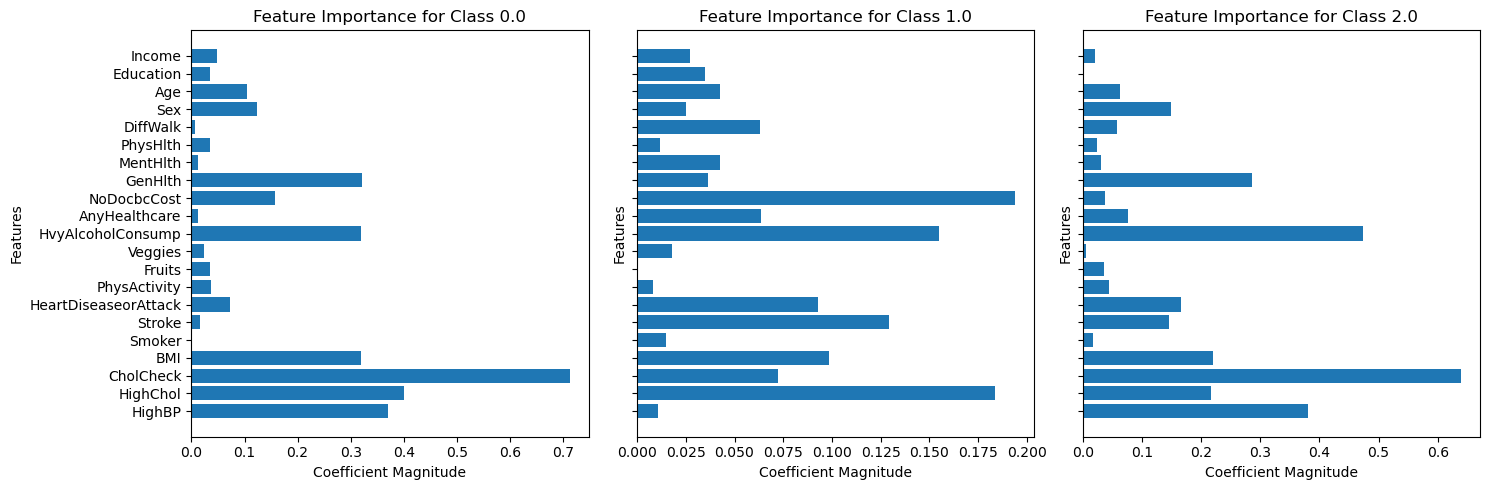

In [38]:


# Plot feature importance for each class
fig, axes = plt.subplots(nrows=1, ncols=len(mlg.classes_), figsize=(15, 5), sharey=True)

for i, cls in enumerate(mlg.classes_):
    axes[i].barh(importance_df.index, importance_df[f'Class_{cls}'])
    axes[i].set_title(f'Feature Importance for Class {cls}')
    axes[i].set_xlabel('Coefficient Magnitude')
    axes[i].set_ylabel('Features')

plt.tight_layout()
plt.show()



#### Some results from alternative ML models

Here, we attempt to boost performance on the minority classes (1: prediabetes, 2: diabetes) by training an XGBoost model on the data.

Due to the structure of the dataset, with prediabetes making up just 1.8% of samples and diabetes making up 13.9% of samples, we propose a few different methodologies for improving upon minority class performance.

In just about any class of ML model, the highest accuracy achievable is around ~85%. This is simply due to the fact that models can achieve close to 85% by predicting that everyone is healthy (class=0). The multinomial linear regression model did slightly better than this on minority classes, but still performed overall pretty poorly on classes 1 and 2.

We propose increasing sample weights of classes 1 and 2 by performing GridSearchCV on the sample_weight parameter of the XGBoostClassifier model. We see that as we increase the sample_weight of the minority classes, we notice 2 things:
1) Performance improves in predicting true positives. I.e. the model starts performing better than simply randomly chance on the minority classes.
2) As expected, the cost of improvement in the minority classes is that we have more false positives in the majority classes (below).

We find that you can improve performance in the minority class to an arbitrary degree by increasing the sample_weight parameter of the minority class. Choosing the correct model in the context depends upon a number of factors. Most notably, the "true cost" of a false positive. In a situation where the true cost of telling someone they may have diabetes is high (health insurance pricing, etc), we would be biased toward a model with fewer false positive, at the cost of worse performance on the diabetes classes. Conversely, in a situation where the true cost of a false positive is lower (for example, flagging to a group of people whether they are at risk without any economic impact to their lives), we would be biased toward a model with more false positives. After all, simply telling someone they are at risk and to eat healthier comes with very little downside in scenarios where our models results have no economic impact to their lives comes with very little downside.

As an example from our work, we see that by increasing the sample_weight of classes 1 and 2 to just over 1/class_proportion (in other words, a slightly higher sample weight than if we did "balanced classes"), we can achieve a result of around ~86% true positives on the minority classes, at a cost of only around ~30% false positives on the healthy classes.

Below, we first train a baseline model. Then we perform gridsearch over the sample_weight parameter and plot our results.

#### XGBoost

In [39]:
import time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


#### Set a baseline paramgrid so that each xgb model uses the same one

In [40]:
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score

# param_grid_xgb = {
#     'learning_rate': [0.1, 0.2, 0.3],
#     'max_depth': [2,3,5],
#     'n_estimators': [100, 250, 500]
# }

# param_grid_xgb = {
#     'learning_rate': [0.1, 0.2],
#     'max_depth': [3, 5],
#     'n_estimators': [200, 400]
# }

param_grid_xgb = {
    'learning_rate': [0.15],
    'max_depth': [4],
    'n_estimators': [300]
}

scoring_xgb = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='macro', zero_division=0),  # Handle undefined cases
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'precision': make_scorer(precision_score, average='macro', zero_division=0)
}

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

#### XGB, Balanced Classes, maximize on accuracy

In [41]:
maximize_on = 'accuracy'
scoring = scoring_xgb
param_grid = param_grid_xgb
xgb_model = xgb_model
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring=scoring, 
                           refit=maximize_on,  # Choose the metric for model selection
                           verbose=1, 
                           n_jobs=-1)
# xgb_model_baseline
grid_search.fit(X_dev_scaled, y_dev)
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation {maximize_on}: {grid_search.best_score_:.4f}")
# Define and evaluate the model
xgb_model_baseline_accuracy = grid_search.best_estimator_
test_accuracy = xgb_model_baseline_accuracy.score(X_test_scaled, y_test)
print(f"Test accuracy from the optimal model: {test_accuracy:.4f}")
y_pred = xgb_model_baseline_accuracy.predict(X_test_scaled)
print(f"\nClassification Report (Test Data) for xgb_model_baseline_{maximize_on}:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation accuracy: 0.8498
Test accuracy from the optimal model: 0.8495

Classification Report (Test Data) for xgb_model_baseline_accuracy:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.18      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGB, balanced classes, maximize on f1

In [42]:
maximize_on = 'f1'
scoring = scoring_xgb
param_grid = param_grid_xgb
xgb_model = xgb_model
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring=scoring, 
                           refit=maximize_on,  # Choose the metric for model selection
                           verbose=1, 
                           n_jobs=-1)
# xgb_model_baseline
grid_search.fit(X_dev_scaled, y_dev)
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation {maximize_on}: {grid_search.best_score_:.4f}")
# Define and evaluate the model
xgb_model_baseline_f1 = grid_search.best_estimator_
test_accuracy = xgb_model_baseline_f1.score(X_test_scaled, y_test)
print(f"Test accuracy from the optimal model: {test_accuracy:.4f}")
y_pred = xgb_model_baseline_f1.predict(X_test_scaled)
print(f"\nClassification Report (Test Data) for xgb_model_baseline_{maximize_on}:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation f1: 0.4000
Test accuracy from the optimal model: 0.8495

Classification Report (Test Data) for xgb_model_baseline_f1:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.18      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGB, balanced classes, maximize on recall

In [43]:
maximize_on = 'recall'
scoring = scoring_xgb
param_grid = param_grid_xgb
xgb_model = xgb_model
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring=scoring, 
                           refit=maximize_on,  # Choose the metric for model selection
                           verbose=1, 
                           n_jobs=-1)


grid_search.fit(X_dev_scaled, y_dev)
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation {maximize_on}: {grid_search.best_score_:.4f}")
# Define and evaluate the model
xgb_model_baseline_recall = grid_search.best_estimator_
test_accuracy = xgb_model_baseline_recall.score(X_test_scaled, y_test)
print(f"Test accuracy from the optimal model: {test_accuracy:.4f}")
y_pred = xgb_model_baseline_recall.predict(X_test_scaled)
print(f"\nClassification Report (Test Data) for xgb_model_baseline_{maximize_on}:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation recall: 0.3888
Test accuracy from the optimal model: 0.8495

Classification Report (Test Data) for xgb_model_baseline_recall:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.18      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### We see that when sample_weight parameter is left as is, as expected performance in classes 1 and 2 is quite poor, with class 1 actually reporting 0 true positives on most of the model iterations. We now explore ways to increase the sample importance of classes 1 and 2, principally by applying a multiplier of 1/class_proportion to first 1) see how the models would perform when all classes are equally represented (similar to SMOTE above) 2) see how high we would need to increase the sample_weight parameters of the minority classes to achieve different benchmarks of performance

In [44]:
# Re-compute class weights for just the dev set to prevent information leakage
dev_class_totals = y_dev.value_counts().sort_index()
dev_class_proportions = dev_class_totals/dev_class_totals.sum()
print(f"dev_class_proportions:\n {dev_class_proportions}")

dev_class_proportions:
 Diabetes
0.0    0.842410
1.0    0.018256
2.0    0.139334
Name: count, dtype: float64


#### Set class_weight equal to the inverse of the class_proportion of the development set

In [45]:
dev_class_weights = 1/dev_class_proportions
print(f"dev_class_weights: {dev_class_weights}")
# Create a series corresponding to the weight of each label in y_dev. ~1 for no diabetes (0), ~7 for diabetes (2), ~54 for prediabetes (1)
sample_weights_dev = y_dev.map(dev_class_weights)
print(sample_weights_dev)

dev_class_weights: Diabetes
0.0     1.187071
1.0    54.775709
2.0     7.176999
Name: count, dtype: float64
185494    1.187071
217030    1.187071
641       1.187071
217863    1.187071
53677     1.187071
            ...   
230663    1.187071
202400    1.187071
176569    1.187071
248159    1.187071
110153    1.187071
Name: Diabetes, Length: 202944, dtype: float64


#### We now train a baseline model with sample_weight set to 1/class_proportion, followed by performing a gridsearch on the sample_weight parameter below to assess the cost (in the form of false diabetes diagnoses to class 0) of achieving a given benchmark performance on the minority classes.

In [46]:
maximize_on = 'accuracy'
scoring = scoring_xgb
param_grid = param_grid_xgb
xgb_model = xgb_model
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring=scoring, 
                           refit=maximize_on,  # Choose the metric for model selection
                           verbose=1, 
                           n_jobs=-1)
# xgb_model_baseline
grid_search.fit(X_dev_scaled, y_dev, sample_weight=sample_weights_dev) # We increase the weights of classes 1 and 2
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation {maximize_on}: {grid_search.best_score_:.4f}")
# Define and evaluate the model
xgb_model_weighted_accuracy = grid_search.best_estimator_
test_accuracy = xgb_model_weighted_accuracy.score(X_test_scaled, y_test)
print(f"Test accuracy from the optimal model: {test_accuracy:.4f}")
y_pred = xgb_model_weighted_accuracy.predict(X_test_scaled)
print(f"\nClassification Report (Test Data) for xgb_model_weighted_{maximize_on}:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation accuracy: 0.6293
Test accuracy from the optimal model: 0.6302

Classification Report (Test Data) for xgb_model_weighted_accuracy:
              precision    recall  f1-score   support

         0.0       0.95      0.64      0.77     42741
         1.0       0.03      0.31      0.06       926
         2.0       0.34      0.62      0.44      7069

    accuracy                           0.63     50736
   macro avg       0.44      0.52      0.42     50736
weighted avg       0.85      0.63      0.71     50736



#### XGB, sample_weights now equal to inverse of class proportion, maximize on f1

In [47]:
maximize_on = 'f1'
scoring = scoring_xgb
param_grid = param_grid_xgb
xgb_model = xgb_model
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring=scoring, 
                           refit=maximize_on,  # Choose the metric for model selection
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_dev_scaled, y_dev, sample_weight=sample_weights_dev) # We increase the weights of classes 1 and 2
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation {maximize_on}: {grid_search.best_score_:.4f}")
# Define and evaluate the model
xgb_model_weighted_f1 = grid_search.best_estimator_
test_accuracy = xgb_model_weighted_f1.score(X_test_scaled, y_test)
print(f"Test accuracy from the optimal model: {test_accuracy:.4f}")
y_pred = xgb_model_weighted_f1.predict(X_test_scaled)
print(f"\nClassification Report (Test Data) for xgb_model_weighted_{maximize_on}:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation f1: 0.4197
Test accuracy from the optimal model: 0.6302

Classification Report (Test Data) for xgb_model_weighted_f1:
              precision    recall  f1-score   support

         0.0       0.95      0.64      0.77     42741
         1.0       0.03      0.31      0.06       926
         2.0       0.34      0.62      0.44      7069

    accuracy                           0.63     50736
   macro avg       0.44      0.52      0.42     50736
weighted avg       0.85      0.63      0.71     50736



#### XGB, sample_weights now equal to inverse of class proportion, maximize on recall

In [48]:
maximize_on = 'recall'
scoring = scoring_xgb
param_grid = param_grid_xgb
xgb_model = xgb_model
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring=scoring, 
                           refit=maximize_on,  # Choose the metric for model selection
                           verbose=1, 
                           n_jobs=-1)


grid_search.fit(X_dev_scaled, y_dev, sample_weight=sample_weights_dev) # We increase the weights of classes 1 and 2
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation {maximize_on}: {grid_search.best_score_:.4f}")
# Define and evaluate the model
xgb_model_weighted_recall = grid_search.best_estimator_
test_accuracy = xgb_model_weighted_recall.score(X_test_scaled, y_test)
print(f"Test accuracy from the optimal model: {test_accuracy:.4f}")
y_pred = xgb_model_weighted_recall.predict(X_test_scaled)
print(f"\nClassification Report (Test Data) for xgb_model_weighted_{maximize_on}:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation recall: 0.5176
Test accuracy from the optimal model: 0.6302

Classification Report (Test Data) for xgb_model_weighted_recall:
              precision    recall  f1-score   support

         0.0       0.95      0.64      0.77     42741
         1.0       0.03      0.31      0.06       926
         2.0       0.34      0.62      0.44      7069

    accuracy                           0.63     50736
   macro avg       0.44      0.52      0.42     50736
weighted avg       0.85      0.63      0.71     50736



#### We see that performance on the minority classes improved when increasing the sample_weight parameter of the minority classes.

#### Now, we perform a gridsearch of the sample_weight parameter. All "shocks" are based relative to the baseline model where sample_weight is set to 1/class_proportion (and not the original baseline model where sample_weight is not touch at all)

In [49]:
print(f"dev_class_weights: {dev_class_weights}")
shocks = [
    0.25,
    0.5,
    1,
    2,
    4,
    8,
    16,
    32,
    64,
] # These shocks will be applied multiplicatively to the sample_weights for diabetes and prediabetes over and above the weights used above
# So far example, if the sample_weights for classes 0,1,2 are [1.19, 54.78, 7.18] as per above, a shock of 2 will make the sample_weights
# equal to [1.19, 109.56, 14.36] (classes 1 and 2 shocked only, not class 0) for example
baseline_model = xgb_model_weighted_f1
y_pred = baseline_model.predict(X_test_scaled)
print(f"\nClassification Report (Test Data) for baseline_model:")
print(classification_report(y_test, y_pred))

shocked_sample_weights = dev_class_weights.copy()

shocked_sample_weights

dev_class_weights: Diabetes
0.0     1.187071
1.0    54.775709
2.0     7.176999
Name: count, dtype: float64

Classification Report (Test Data) for baseline_model:
              precision    recall  f1-score   support

         0.0       0.95      0.64      0.77     42741
         1.0       0.03      0.31      0.06       926
         2.0       0.34      0.62      0.44      7069

    accuracy                           0.63     50736
   macro avg       0.44      0.52      0.42     50736
weighted avg       0.85      0.63      0.71     50736



Diabetes
0.0     1.187071
1.0    54.775709
2.0     7.176999
Name: count, dtype: float64

#### Define a diabetes false positive function. This is the conditional probability someone is diagnosed with diabetes or prediabetes, given that they actually have neither. We combine classes 1 and 2 in this analysis for simplicity to capture the bigger picture costs of increasing minority class sample_weights

In [50]:
# Given you dont have diabetes, the likelihood you get a false diagnosis

def false_pos_diabetes_rate(y_true,y_pred):
    y_df = pd.DataFrame({'y_true':y_true,'y_pred':y_pred})
    y_df['false_positive']=(y_df['y_true']==0)&((y_df['y_pred']==1)|(y_df['y_pred']==2))
    false_pos = y_df['false_positive'].sum()
    no_diabetes = (y_df['y_true']==0).sum()
    return false_pos/no_diabetes

#### Define a diabetes true positive function. This is the probability that someone with either prediabetes or diabetes is diagnosed with either diabetes or prediabetes. 

In [51]:
# Given you are pre or actual diabetes, the likelihood you are diagnosed as such

def true_pos_diabetes_rate(y_true,y_pred):
    y_df = pd.DataFrame({'y_true':y_true,'y_pred':y_pred})
    y_df['true_positive']=((y_df['y_true']==1)|(y_df['y_true']==2))&((y_df['y_pred']==1)|(y_df['y_pred']==2))
    true_pos = y_df['true_positive'].sum()
    diabetes = ((y_df['y_true']==1)|(y_df['y_true']==2)).sum()
    return true_pos/diabetes

In [52]:
shock_results_classification_reports = {}
shock_results_false_positives = {}
shock_results_true_positives = {}

for shock in shocks:
    shocked_sample_weights = dev_class_weights.copy()
    shocked_sample_weights[1] = dev_class_weights[1] * shock
    shocked_sample_weights[2] = dev_class_weights[2] * shock
    shocked_sample_weights_dev = y_dev.map(shocked_sample_weights)
    print(f"shocked_sample_weights: {shocked_sample_weights}")
    maximize_on = 'f1'
    scoring = scoring_xgb
    param_grid = param_grid_xgb
    xgb_model = xgb_model
    grid_search = GridSearchCV(estimator=xgb_model, 
                            param_grid=param_grid, 
                            cv=5, 
                            scoring=scoring, 
                            refit=maximize_on,
                            verbose=1, 
                            n_jobs=-1)
    grid_search.fit(X_dev_scaled, y_dev, sample_weight=shocked_sample_weights_dev) # Here we adjust the sample weights to equal the shocked weights
    xgb_model_shocked_f1 = grid_search.best_estimator_
    y_pred = xgb_model_shocked_f1.predict(X_test_scaled)
    print(f"\nClassification Report (Test Data) for shocked model for shock: {shock}:\n")
    print(classification_report(y_test, y_pred))
    false_pos_rate = false_pos_diabetes_rate(y_test,y_pred)
    print(f"false_positive_rate: {false_pos_rate}")
    shock_results_false_positives[shock] = false_pos_rate
    true_pos_rate = true_pos_diabetes_rate(y_test,y_pred)
    print(f"true_positive_rate: {true_pos_rate}")
    shock_results_true_positives[shock] = true_pos_rate
    shock_results_classification_reports[shock] = classification_report(y_test, y_pred)
    


shocked_sample_weights: Diabetes
0.0     1.187071
1.0    13.693927
2.0     1.794250
Name: count, dtype: float64
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Classification Report (Test Data) for shocked model for shock: 0.25:

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     42741
         1.0       0.06      0.04      0.05       926
         2.0       0.49      0.32      0.38      7069

    accuracy                           0.84     50736
   macro avg       0.48      0.43      0.45     50736
weighted avg       0.81      0.84      0.82     50736

false_positive_rate: 0.06003603097728177
true_positive_rate: 0.3387116948092558
shocked_sample_weights: Diabetes
0.0     1.187071
1.0    27.387854
2.0     3.588499
Name: count, dtype: float64
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Classification Report (Test Data) for shocked model for shock: 0.5:

              precision    recall  f1-score   support

 

In [53]:
shock_results_false_positives

{0.25: 0.06003603097728177,
 0.5: 0.17725369083549752,
 1: 0.36103507171100346,
 2: 0.5482791698837182,
 4: 0.693268758335088,
 8: 0.7971502772513511,
 16: 0.8724175849886526,
 32: 0.9216911162583936,
 64: 0.9521536697784329}

In [54]:
shock_results_true_positives

{0.25: 0.3387116948092558,
 0.5: 0.626266416510319,
 1: 0.8373983739837398,
 2: 0.9390869293308318,
 4: 0.974108818011257,
 8: 0.9881175734834271,
 16: 0.9943714821763602,
 32: 0.9968730456535334,
 64: 0.9976235146966854}

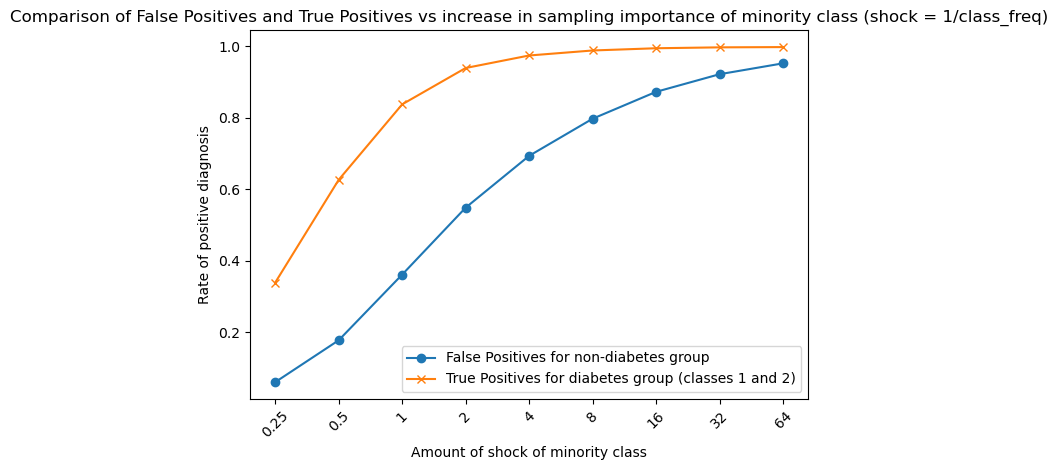

In [55]:
keys = list(shock_results_false_positives.keys())
keys_rounded = [round(k,2) for k in keys]
false_positives = list(shock_results_false_positives.values())
true_positives = list(shock_results_true_positives.values())

x_indices = range(len(keys_rounded))

# Plotting
plt.plot(x_indices, false_positives, label='False Positives for non-diabetes group', marker='o')
plt.plot(x_indices, true_positives, label='True Positives for diabetes group (classes 1 and 2)', marker='x')

# Customize the plot
plt.xticks(x_indices, keys_rounded, rotation=45)  # Set the x-ticks to the keys, rotate them for clarity
plt.xlabel('Amount of shock of minority class')
plt.ylabel('Rate of positive diagnosis')
plt.title('Comparison of False Positives and True Positives vs increase in sampling importance of minority class (shock = 1/class_freq)')
plt.legend()

# Show the plot
plt.tight_layout()  # To ensure the labels fit
plt.show()

#### Scale sample_weights exponentially. Examine true positive vs false positive rates.

In [56]:
# Generate numbers from 0 to 2 with a step of 0.2
exp_values = np.arange(0, 2.2, 0.2) 

shock_results_classification_reports_exp = {}
shock_results_false_positives_exp = {}
shock_results_true_positives_exp = {}

for exp_shock in exp_values:
    shocked_sample_weights_exp = dev_class_weights.copy()
    shocked_sample_weights_exp[0] = dev_class_weights[0] ** exp_shock
    shocked_sample_weights_exp[1] = dev_class_weights[1] ** exp_shock
    shocked_sample_weights_exp[2] = dev_class_weights[2] ** exp_shock
    shocked_sample_weights_dev = y_dev.map(shocked_sample_weights_exp)
    print(f"shocked_sample_weights_exp: {shocked_sample_weights_exp}")
    maximize_on = 'f1'
    scoring = scoring_xgb
    param_grid = param_grid_xgb
    xgb_model = xgb_model
    grid_search = GridSearchCV(estimator=xgb_model, 
                            param_grid=param_grid, 
                            cv=5, 
                            scoring=scoring, 
                            refit=maximize_on,
                            verbose=1, 
                            n_jobs=-1)
    grid_search.fit(X_dev_scaled, y_dev, sample_weight=shocked_sample_weights_dev) # Here we adjust the sample weights to equal the shocked weights
    xgb_model_shocked_f1 = grid_search.best_estimator_
    y_pred = xgb_model_shocked_f1.predict(X_test_scaled)
    print(f"\nClassification Report (Test Data) for shocked_exp model for exp_shock: {exp_shock}:\n")
    print(classification_report(y_test, y_pred))
    false_pos_rate = false_pos_diabetes_rate(y_test,y_pred)
    print(f"false_positive_rate: {false_pos_rate}")
    shock_results_false_positives_exp[exp_shock] = false_pos_rate
    true_pos_rate = true_pos_diabetes_rate(y_test,y_pred)
    print(f"true_positive_rate: {true_pos_rate}")
    shock_results_true_positives_exp[exp_shock] = true_pos_rate
    shock_results_classification_reports_exp[exp_shock] = classification_report(y_test, y_pred)



shocked_sample_weights_exp: Diabetes
0.0    1.0
1.0    1.0
2.0    1.0
Name: count, dtype: float64
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Classification Report (Test Data) for shocked_exp model for exp_shock: 0.0:

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.18      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736

false_positive_rate: 0.022063124400458576
true_positive_rate: 0.1742338961851157
shocked_sample_weights_exp: Diabetes
0.0    1.034893
1.0    2.226987
2.0    1.483162
Name: count, dtype: float64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/


Classification Report (Test Data) for shocked_exp model for exp_shock: 0.2:

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.49      0.31      0.38      7069

    accuracy                           0.84     50736
   macro avg       0.46      0.42      0.43     50736
weighted avg       0.81      0.84      0.82     50736

false_positive_rate: 0.04838445520694415
true_positive_rate: 0.29631019387116947
shocked_sample_weights_exp: Diabetes
0.0    1.071003
1.0    4.959469
2.0    2.199769
Name: count, dtype: float64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/


Classification Report (Test Data) for shocked_exp model for exp_shock: 0.4:

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.44      0.45      0.44      7069

    accuracy                           0.83     50736
   macro avg       0.44      0.45      0.45     50736
weighted avg       0.82      0.83      0.82     50736

false_positive_rate: 0.08832268781731827
true_positive_rate: 0.432895559724828
shocked_sample_weights_exp: Diabetes
0.0     1.108373
1.0    11.044671
2.0     3.262614
Name: count, dtype: float64
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Classification Report (Test Data) for shocked_exp model for exp_shock: 0.6000000000000001:

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88     42741
         1.0       0.01      0.00      0.00       926
         2.0       0.39      0.

In [57]:
shock_results_false_positives_exp

{0.0: 0.022063124400458576,
 0.2: 0.04838445520694415,
 0.4: 0.08832268781731827,
 0.6000000000000001: 0.1451299688823378,
 0.8: 0.21705154301490373,
 1.0: 0.36103507171100346,
 1.2000000000000002: 0.5530755012751223,
 1.4000000000000001: 0.7031187852413373,
 1.6: 0.8065557661262021,
 1.8: 0.8697035633232727,
 2.0: 0.9113497578437566}

In [58]:
shock_results_true_positives_exp

{0.0: 0.1742338961851157,
 0.2: 0.29631019387116947,
 0.4: 0.432895559724828,
 0.6000000000000001: 0.5731081926203877,
 0.8: 0.6933083176985616,
 1.0: 0.8373983739837398,
 1.2000000000000002: 0.9352095059412132,
 1.4000000000000001: 0.9743589743589743,
 1.6: 0.9884928080050032,
 1.8: 0.9928705440900563,
 2.0: 0.9948717948717949}

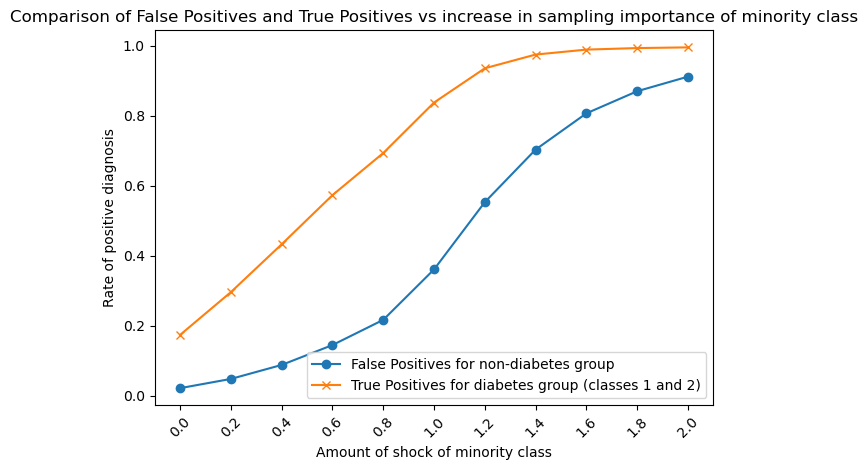

In [59]:
keys = list(shock_results_false_positives_exp.keys())
keys_rounded = [round(k,2) for k in keys]
false_positives = list(shock_results_false_positives_exp.values())
true_positives = list(shock_results_true_positives_exp.values())

x_indices = range(len(keys_rounded))

# Plotting
plt.plot(x_indices, false_positives, label='False Positives for non-diabetes group', marker='o')
plt.plot(x_indices, true_positives, label='True Positives for diabetes group (classes 1 and 2)', marker='x')

# Customize the plot
plt.xticks(x_indices, keys_rounded, rotation=45)  # Set the x-ticks to the keys, rotate them for clarity
plt.xlabel('Amount of shock of minority class')
plt.ylabel('Rate of positive diagnosis')
plt.title('Comparison of False Positives and True Positives vs increase in sampling importance of minority class')
plt.legend()

# Show the plot
plt.tight_layout()  # To ensure the labels fit
plt.show()